In [4]:
from rdkit import Chem
from rdkit.Chem import Draw

In [5]:
drugbank_input = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in drugbank_input if m]

In [11]:
patterns = {
    'coo':Chem.MolFromSmarts('C(=O)O'),
    'benzene':Chem.MolFromSmarts('c1ccccc1'),
    'n':Chem.MolFromSmarts('[#7]'),
    'halogen':Chem.MolFromSmarts('[F,Cl,Br,I]'),
    'tripleBond':Chem.MolFromSmarts('*#*'),
    'aliphaticC':Chem.MolFromSmarts('C'),
    's':Chem.MolFromSmarts('[#16]'),   
}

order = ['coo', 'benzene', 'n', 'halogen', 'tripleBond', 'aliphaticC', 's']

def customkey(mol):
    return tuple((mol.HasSubstructMatch(patterns[pattern]) for pattern in order))

In [12]:
# zkouska vytvorene klice, bitovy vektor
customkey(drugbank[666])

(True, True, True, False, False, True, False)

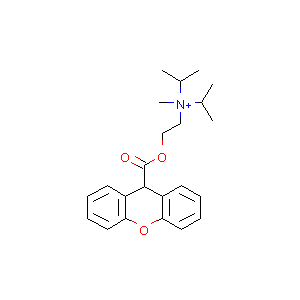

In [14]:
Draw.MolToImage(drugbank[666])

In [15]:
# vybrane fingerprinty
drugbankAwesomeFPS = [customkey(mol) for mol in drugbank]
len(drugbankAwesomeFPS)

7110

In [16]:
hasAll = [m for m,fp in zip(drugbank, drugbankAwesomeFPS) if all(fp)]
len(hasAll)

3

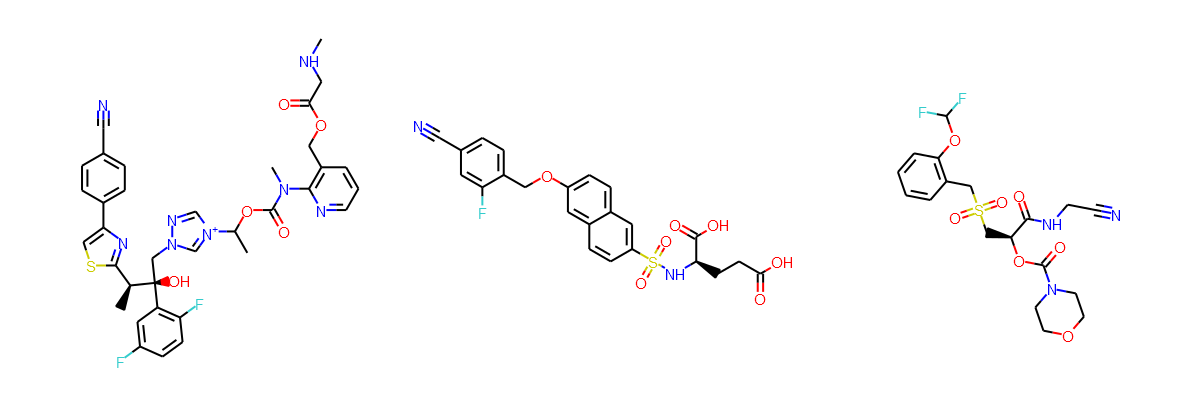

In [20]:
Draw.MolsToGridImage(hasAll, subImgSize=(400, 400))

In [22]:
from rdkit.Chem import MACCSkeys

In [23]:
key = MACCSkeys.GenMACCSKeys(drugbank[666])
key

In [25]:
key.ToBitString()

'00000000000000000000000000000010000000000000000001000000010000000000000000100000000001100000010100101100010011011101101000110110000010000110010011111100111111111111110'

In [27]:
drugbankMaccs = [MACCSkeys.GenMACCSKeys(mol) for mol in drugbank]

In [28]:
len(drugbankMaccs)

7110

# Similarity

In [29]:
# tanemoto koeficient, jaccard index: pocet bitu co maji nastaveny stejne vs pocet vsech bitu
# pokud sdili vsechno = 1, jsou totozne, z hlediska fingerpritnu
# stejne struktury, neznamenaji stejne struktury
# smyslem je mit ciselne vyjadreni podobnosti dvou struktur
# sar princip, podobne molekuly maji vetsi sanci, ze budou mit podobnou aktivitu, pozor na sar paradox ( i mala zmena zpusobi jinou funkci)

In [37]:
def tanimotoSimilarity(fp1, fp2):
    fp1onBits = set((i for i, bit in enumerate (fp1) if bit))
    fp2onBits = set((i for i, bit in enumerate (fp2) if bit))
    allBits = fp1onBits.union(fp2onBits)
    sharedBits = fp1onBits.intersection(fp2onBits)
    if not allBits:
        return None
    return len(sharedBits) / len(allBits)

In [38]:
tanimotoSimilarity((True, True, True), (True, False, True))

0.6666666666666666

In [39]:
salicylA = Chem.MolFromSmiles("c1ccc(c(c1)C(=O)O)O")
salicylAkey = customkey(salicylA)
salicylAkey

(True, True, False, False, False, True, False)

In [40]:
salicylAsimilarities = [tanimotoSimilarity(salicylAkey, fp) for fp in drugbankAwesomeFPS]

In [41]:
salicylAsimilarities[666]

0.75

In [42]:
completeHits = [i for i, similarity in enumerate(salicylAsimilarities) if similarity == 1]
len(completeHits)

148

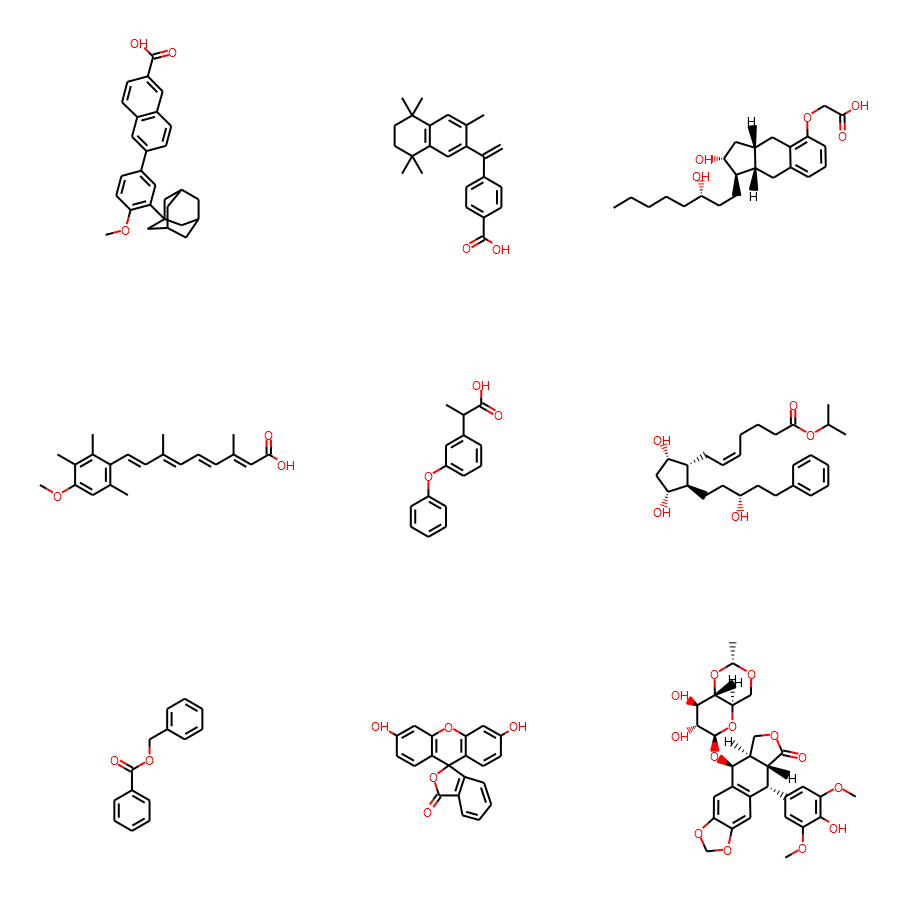

In [44]:
Draw.MolsToGridImage([drugbank[i] for i in completeHits[:9]], subImgSize = (300, 300))

In [45]:
salicylAmaccs = MACCSkeys.GenMACCSKeys(salicylA)

In [ ]:
from rdkit import DataStructs
salicylAmaccsSim = DataStructs.FingerprintSimilarity(salicylAmaccs)

goodMatches